In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('TRAIN.csv')
test_df = pd.read_csv('TEST_FINAL.csv')
test_df_cpy = test_df.copy()

In [3]:
train_df

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0       T1000001         1         S1            L3          R1  2018-01-01   
1       T1000002       253         S4            L2          R1  2018-01-01   
2       T1000003       252         S3            L2          R1  2018-01-01   
3       T1000004       251         S2            L3          R1  2018-01-01   
4       T1000005       250         S2            L3          R4  2018-01-01   
...          ...       ...        ...           ...         ...         ...   
188335  T1188336       149         S2            L3          R2  2019-05-31   
188336  T1188337       153         S4            L2          R1  2019-05-31   
188337  T1188338       154         S1            L3          R2  2019-05-31   
188338  T1188339       155         S3            L1          R2  2019-05-31   
188339  T1188340       152         S2            L1          R1  2019-05-31   

        Holiday Discount  #Order     Sales  
0             1      Yes       9   7011.84  
1             1      Yes      60  51789.12  
2             1      Yes      42  36868.20  
3             1      Yes      23  19715.16  
4             1      Yes      62  45614.52  
...         ...      ...     ...       ...  
188335        1      Yes      51  37272.00  
188336        1       No      90  54572.64  
188337        1       No      56  31624.56  
188338        1      Yes      70  49162.41  
188339        1       No      47  37977.00  

[188340 rows x 10 columns]

In [4]:
test_df

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0      T1188341       171         S4            L2          R3  2019-06-01   
1      T1188342       172         S1            L1          R1  2019-06-01   
2      T1188343       173         S4            L2          R1  2019-06-01   
3      T1188344       174         S1            L1          R4  2019-06-01   
4      T1188345       170         S1            L1          R2  2019-06-01   
...         ...       ...        ...           ...         ...         ...   
22260  T1210601       186         S2            L5          R2  2019-07-31   
22261  T1210602        11         S4            L2          R1  2019-07-31   
22262  T1210603       185         S1            L1          R3  2019-07-31   
22263  T1210604        69         S1            L1          R4  2019-07-31   
22264  T1210605       365         S2            L1          R2  2019-07-31   

       Holiday Discount  
0            0       No  
1            0       No  
2            0       No  
3            0       No  
4            0       No  
...        ...      ...  
22260        0       No  
22261        0       No  
22262        0      Yes  
22263        0       No  
22264        0       No  

[22265 rows x 8 columns]

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
train_df.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [7]:
train_df.drop(['ID','#Order'],axis=1,inplace=True)
test_df.drop(['ID'],axis=1,inplace=True)

In [8]:
train_df.head()

Store_id Store_Type Location_Type Region_Code        Date  Holiday  \
0         1         S1            L3          R1  2018-01-01        1   
1       253         S4            L2          R1  2018-01-01        1   
2       252         S3            L2          R1  2018-01-01        1   
3       251         S2            L3          R1  2018-01-01        1   
4       250         S2            L3          R4  2018-01-01        1   

  Discount     Sales  
0      Yes   7011.84  
1      Yes  51789.12  
2      Yes  36868.20  
3      Yes  19715.16  
4      Yes  45614.52

In [9]:
# Date
train_date_lst = []
train_year_date_lst = []
train_month_date_lst = []
train_day_date_lst = []
train_weekday_date_lst = []

for d in train_df['Date']:
  train_date_lst.append(dt.datetime.strptime(d,'%Y-%m-%d'))

for year in train_date_lst:
  train_year_date_lst.append(year.strftime('%Y'))

for month in train_date_lst:
  train_month_date_lst.append(month.strftime('%m'))

for day in train_date_lst:
  train_day_date_lst.append(day.strftime('%d'))

for weekday in train_date_lst:
  train_weekday_date_lst.append(weekday.strftime('%A'))
# print(date_lst[0].strftime('%A'))

In [10]:
# Date
test_date_lst = []
test_year_date_lst = []
test_month_date_lst = []
test_day_date_lst = []
test_weekday_date_lst = []

for d in test_df['Date']:
  test_date_lst.append(dt.datetime.strptime(d,'%Y-%m-%d'))

for year in test_date_lst:
  test_year_date_lst.append(year.strftime('%Y'))

for month in test_date_lst:
  test_month_date_lst.append(month.strftime('%m'))

for day in test_date_lst:
  test_day_date_lst.append(day.strftime('%d'))

for weekday in test_date_lst:
  test_weekday_date_lst.append(weekday.strftime('%A'))
# print(date_lst[0].strftime('%A'))

In [11]:
train_df['Year'] = pd.Series(train_year_date_lst)
train_df['Month'] = pd.Series(train_month_date_lst)
train_df['Day'] = pd.Series(train_day_date_lst)
train_df['Week Day'] = pd.Series(train_weekday_date_lst)

test_df['Year'] = pd.Series(test_year_date_lst)
test_df['Month'] = pd.Series(test_month_date_lst)
test_df['Day'] = pd.Series(test_day_date_lst)
test_df['Week Day'] = pd.Series(test_weekday_date_lst)

In [12]:
train_df.drop(['Date'],axis=1,inplace=True)
train_df.head()

Store_id Store_Type Location_Type Region_Code  Holiday Discount     Sales  \
0         1         S1            L3          R1        1      Yes   7011.84   
1       253         S4            L2          R1        1      Yes  51789.12   
2       252         S3            L2          R1        1      Yes  36868.20   
3       251         S2            L3          R1        1      Yes  19715.16   
4       250         S2            L3          R4        1      Yes  45614.52   

   Year Month Day Week Day  
0  2018    01  01   Monday  
1  2018    01  01   Monday  
2  2018    01  01   Monday  
3  2018    01  01   Monday  
4  2018    01  01   Monday

In [13]:
test_df.drop(['Date'],axis=1,inplace=True)
test_df.head()

Store_id Store_Type Location_Type Region_Code  Holiday Discount  Year  \
0       171         S4            L2          R3        0       No  2019   
1       172         S1            L1          R1        0       No  2019   
2       173         S4            L2          R1        0       No  2019   
3       174         S1            L1          R4        0       No  2019   
4       170         S1            L1          R2        0       No  2019   

  Month Day  Week Day  
0    06  01  Saturday  
1    06  01  Saturday  
2    06  01  Saturday  
3    06  01  Saturday  
4    06  01  Saturday

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
train_df['Store_Type'] = encoder.fit_transform(train_df['Store_Type'])
train_df['Location_Type'] = encoder.fit_transform(train_df['Location_Type'])
train_df['Region_Code'] = encoder.fit_transform(train_df['Region_Code'])
train_df['Discount'] = encoder.fit_transform(train_df['Discount'])
train_df['Week Day'] = encoder.fit_transform(train_df['Week Day'])

test_df['Store_Type'] = encoder.fit_transform(test_df['Store_Type'])
test_df['Location_Type'] = encoder.fit_transform(test_df['Location_Type'])
test_df['Region_Code'] = encoder.fit_transform(test_df['Region_Code'])
test_df['Discount'] = encoder.fit_transform(test_df['Discount'])
test_df['Week Day'] = encoder.fit_transform(test_df['Week Day'])

In [16]:
train_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0         1           0              2            0        1         1   
1       253           3              1            0        1         1   
2       252           2              1            0        1         1   
3       251           1              2            0        1         1   
4       250           1              2            3        1         1   

      Sales  Year Month Day  Week Day  
0   7011.84  2018    01  01         1  
1  51789.12  2018    01  01         1  
2  36868.20  2018    01  01         1  
3  19715.16  2018    01  01         1  
4  45614.52  2018    01  01         1

In [17]:
train_df.groupby(['Year','Holiday'])['Store_id'].count()

Year  Holiday
2018  0          116070
      1           17155
2019  0           47450
      1            7665
Name: Store_id, dtype: int64

In [18]:
train_df['Holidays in Year'] = train_df.groupby(['Year','Holiday'])['Store_id'].transform('count')
train_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0         1           0              2            0        1         1   
1       253           3              1            0        1         1   
2       252           2              1            0        1         1   
3       251           1              2            0        1         1   
4       250           1              2            3        1         1   

      Sales  Year Month Day  Week Day  Holidays in Year  
0   7011.84  2018    01  01         1             17155  
1  51789.12  2018    01  01         1             17155  
2  36868.20  2018    01  01         1             17155  
3  19715.16  2018    01  01         1             17155  
4  45614.52  2018    01  01         1             17155

In [19]:
test_df['Holidays in Year'] = test_df.groupby(['Year','Holiday'])['Store_id'].transform('count')
test_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  Year  \
0       171           3              1            2        0         0  2019   
1       172           0              0            0        0         0  2019   
2       173           3              1            0        0         0  2019   
3       174           0              0            3        0         0  2019   
4       170           0              0            1        0         0  2019   

  Month Day  Week Day  Holidays in Year  
0    06  01         2             21535  
1    06  01         2             21535  
2    06  01         2             21535  
3    06  01         2             21535  
4    06  01         2             21535

In [20]:
train_df.groupby(['Month','Holiday'])['Store_id'].count()

Month  Holiday
01     0          18980
       1           3650
02     0          18615
       1           1825
03     0          18980
       1           3650
04     0          17885
       1           4015
05     0          21170
       1           1460
06     0          10220
       1            730
07     0          10950
       1            365
08     0           9490
       1           1825
09     0           9855
       1           1095
10     0           8760
       1           2555
11     0           8030
       1           2920
12     0          10585
       1            730
Name: Store_id, dtype: int64

In [21]:
train_df['Holidays in Month'] = train_df.groupby(['Month','Holiday'])['Store_id'].transform('count')
train_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0         1           0              2            0        1         1   
1       253           3              1            0        1         1   
2       252           2              1            0        1         1   
3       251           1              2            0        1         1   
4       250           1              2            3        1         1   

      Sales  Year Month Day  Week Day  Holidays in Year  Holidays in Month  
0   7011.84  2018    01  01         1             17155               3650  
1  51789.12  2018    01  01         1             17155               3650  
2  36868.20  2018    01  01         1             17155               3650  
3  19715.16  2018    01  01         1             17155               3650  
4  45614.52  2018    01  01         1             17155               3650

In [22]:
test_df['Holidays in Month'] = test_df.groupby(['Month','Holiday'])['Store_id'].transform('count')
test_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  Year  \
0       171           3              1            2        0         0  2019   
1       172           0              0            0        0         0  2019   
2       173           3              1            0        0         0  2019   
3       174           0              0            3        0         0  2019   
4       170           0              0            1        0         0  2019   

  Month Day  Week Day  Holidays in Year  Holidays in Month  
0    06  01         2             21535              10585  
1    06  01         2             21535              10585  
2    06  01         2             21535              10585  
3    06  01         2             21535              10585  
4    06  01         2             21535              10585

In [23]:
train_df.groupby(['Year','Discount'])['Store_id'].count()

Year  Discount
2018  0           72321
      1           60904
2019  0           31730
      1           23385
Name: Store_id, dtype: int64

In [24]:
train_df['Dicounts in Year'] = train_df.groupby(['Year','Discount'])['Store_id'].transform('count')
train_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0         1           0              2            0        1         1   
1       253           3              1            0        1         1   
2       252           2              1            0        1         1   
3       251           1              2            0        1         1   
4       250           1              2            3        1         1   

      Sales  Year Month Day  Week Day  Holidays in Year  Holidays in Month  \
0   7011.84  2018    01  01         1             17155               3650   
1  51789.12  2018    01  01         1             17155               3650   
2  36868.20  2018    01  01         1             17155               3650   
3  19715.16  2018    01  01         1             17155               3650   
4  45614.52  2018    01  01         1             17155               3650   

   Dicounts in Year  
0             60904  
1             60904  
2             60904  
3             60904  
4             60904

In [25]:
test_df['Dicounts in Year'] = test_df.groupby(['Year','Discount'])['Store_id'].transform('count')
test_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  Year  \
0       171           3              1            2        0         0  2019   
1       172           0              0            0        0         0  2019   
2       173           3              1            0        0         0  2019   
3       174           0              0            3        0         0  2019   
4       170           0              0            1        0         0  2019   

  Month Day  Week Day  Holidays in Year  Holidays in Month  Dicounts in Year  
0    06  01         2             21535              10585             12773  
1    06  01         2             21535              10585             12773  
2    06  01         2             21535              10585             12773  
3    06  01         2             21535              10585             12773  
4    06  01         2             21535              10585             12773

In [26]:
train_df.groupby(['Month','Discount'])['Store_id'].count()

Month  Discount
01     0           12285
       1           10345
02     0           12325
       1            8115
03     0           11876
       1           10754
04     0           13918
       1            7982
05     0           11644
       1           10986
06     0            5822
       1            5128
07     0            5940
       1            5375
08     0            5732
       1            5583
09     0            5619
       1            5331
10     0            5925
       1            5390
11     0            6504
       1            4446
12     0            6461
       1            4854
Name: Store_id, dtype: int64

In [27]:
train_df['Dicounts in Month'] = train_df.groupby(['Month','Discount'])['Store_id'].transform('count')
train_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0         1           0              2            0        1         1   
1       253           3              1            0        1         1   
2       252           2              1            0        1         1   
3       251           1              2            0        1         1   
4       250           1              2            3        1         1   

      Sales  Year Month Day  Week Day  Holidays in Year  Holidays in Month  \
0   7011.84  2018    01  01         1             17155               3650   
1  51789.12  2018    01  01         1             17155               3650   
2  36868.20  2018    01  01         1             17155               3650   
3  19715.16  2018    01  01         1             17155               3650   
4  45614.52  2018    01  01         1             17155               3650   

   Dicounts in Year  Dicounts in Month  
0             60904              10345  
1             60904              10345  
2             60904              10345  
3             60904              10345  
4             60904              10345

In [28]:
test_df['Dicounts in Month'] = test_df.groupby(['Month','Discount'])['Store_id'].transform('count')
test_df.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  Year  \
0       171           3              1            2        0         0  2019   
1       172           0              0            0        0         0  2019   
2       173           3              1            0        0         0  2019   
3       174           0              0            3        0         0  2019   
4       170           0              0            1        0         0  2019   

  Month Day  Week Day  Holidays in Year  Holidays in Month  Dicounts in Year  \
0    06  01         2             21535              10585             12773   
1    06  01         2             21535              10585             12773   
2    06  01         2             21535              10585             12773   
3    06  01         2             21535              10585             12773   
4    06  01         2             21535              10585             12773   

   Dicounts in Month  
0               6227  
1               6227  
2               6227  
3               6227  
4               6227

In [29]:
train_df['Year'] = train_df['Year'].astype('int')
train_df['Month'] = train_df['Month'].astype('int')
train_df['Day'] = train_df['Day'].astype('int')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Store_id           188340 non-null  int64  
 1   Store_Type         188340 non-null  int64  
 2   Location_Type      188340 non-null  int64  
 3   Region_Code        188340 non-null  int64  
 4   Holiday            188340 non-null  int64  
 5   Discount           188340 non-null  int64  
 6   Sales              188340 non-null  float64
 7   Year               188340 non-null  int64  
 8   Month              188340 non-null  int64  
 9   Day                188340 non-null  int64  
 10  Week Day           188340 non-null  int64  
 11  Holidays in Year   188340 non-null  int64  
 12  Holidays in Month  188340 non-null  int64  
 13  Dicounts in Year   188340 non-null  int64  
 14  Dicounts in Month  188340 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 21.6 MB


In [30]:
test_df['Year'] = test_df['Year'].astype('int')
test_df['Month'] = test_df['Month'].astype('int')
test_df['Day'] = test_df['Day'].astype('int')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Store_id           22265 non-null  int64
 1   Store_Type         22265 non-null  int64
 2   Location_Type      22265 non-null  int64
 3   Region_Code        22265 non-null  int64
 4   Holiday            22265 non-null  int64
 5   Discount           22265 non-null  int64
 6   Year               22265 non-null  int64
 7   Month              22265 non-null  int64
 8   Day                22265 non-null  int64
 9   Week Day           22265 non-null  int64
 10  Holidays in Year   22265 non-null  int64
 11  Holidays in Month  22265 non-null  int64
 12  Dicounts in Year   22265 non-null  int64
 13  Dicounts in Month  22265 non-null  int64
dtypes: int64(14)
memory usage: 2.4 MB


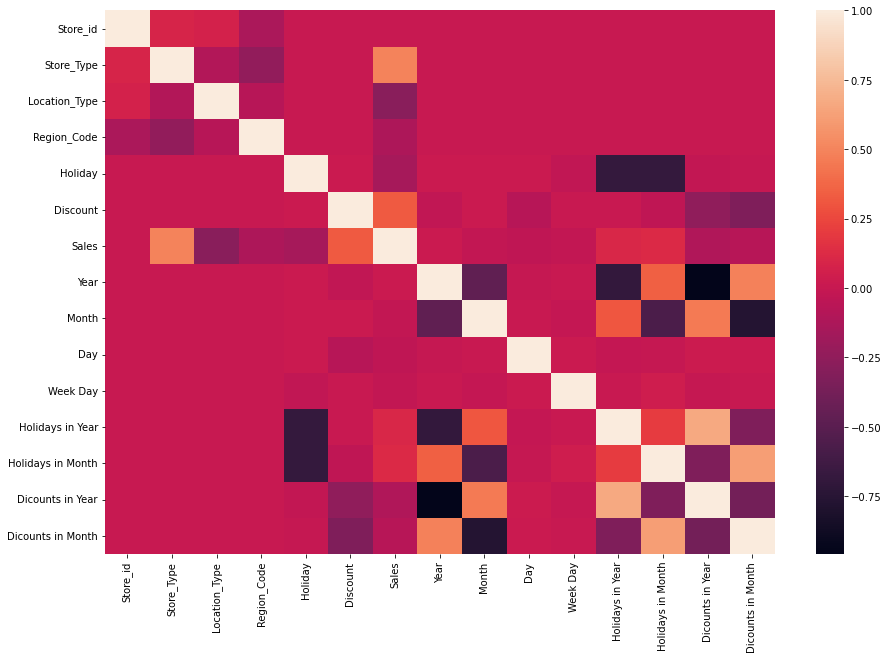

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr())
plt.show()

In [32]:
train_X = train_df.drop(['Sales'],axis=1)
train_Y = train_df['Sales']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.fit_transform(test_df)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(scaled_train_X,train_Y,test_size=0.25,random_state=42)

# Hyper Paramter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [38]:
param_grid_lr = {'copy_X':['True','False'],              
              'fit_intercept':['True','False'],
              'normalize':[True,False],}  
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, refit = True, verbose = 3,n_jobs=-1) 
grid_lr.fit(X_train,Y_train) 

print('\n')

Y1_train_pred = grid_lr.predict(X_train)
Y1_valid_pred = grid_lr.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y1_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y1_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y1_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y1_valid_pred)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/hasmukh/tensorflow/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/hasmukh/tensorflow/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeli

/Users/hasmukh/tensorflow/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/hasmukh/tensorflow/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/hasmukh/tensorflow/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was depreca



Train Accuracy:  0.4348903850828726
Validation Accuracy:  0.4319667673652028

Train RMSE Error:  13894.42257893147
Validation RMSE Error:  13850.412447294297


## K-NN

In [39]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [40]:
param_grid_knn = {'n_neighbors':[3,5,11,29],              
              'metric':['euclidean','manhattan'],              
              'weights':['uniform','distance']}  
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, refit = True, verbose = 3,n_jobs=-1) 
grid_knn.fit(X_train,Y_train) 

print('\n')

Y2_train_pred = grid_knn.predict(X_train)
Y2_valid_pred = grid_knn.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y2_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y2_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y2_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y2_valid_pred)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Train Accuracy:  0.7660315156098261
Validation Accuracy:  0.7158203486279168

Train RMSE Error:  8940.315307686764
Validation RMSE Error:  9796.53112231885


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
param_grid_dt = {"splitter":["best","random"],
                "max_depth" : [1,5,9,12],
                "min_samples_leaf":[1,3,5,8,10],
                "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,40,70,90] }
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, refit = True, verbose = 3,n_jobs=-1) 
grid_dt.fit(X_train,Y_train) 

print('\n')

Y3_train_pred = grid_knn.predict(X_train)
Y3_valid_pred = grid_knn.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y3_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y3_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y3_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y3_valid_pred)))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV 1/5] END copy_X=True, fit_intercept=True, normalize=False;, score=0.437 total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=True;, score=0.437 total time=   0.1s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=False;, score=0.430 total time=   0.1s
[CV 1/5] END copy_X=False, fit_intercept=True, normalize=False;, score=0.437 total time=   0.1s
[CV 1/5] END copy_X=False, fit_intercept=False, normalize=False;, score=0.437 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.638 total time=   3.0s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.677 total time=   3.8s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.658 total time=   4.0s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.684 total time=   5.6s
[CV 1/5] END metric=euclidean, n_neighbors=29, weights=distance;, score

[CV 2/5] END copy_X=True, fit_intercept=True, normalize=True;, score=0.440 total time=   0.1s
[CV 4/5] END copy_X=True, fit_intercept=False, normalize=True;, score=0.431 total time=   0.1s
[CV 2/5] END copy_X=False, fit_intercept=True, normalize=True;, score=0.440 total time=   0.1s
[CV 1/5] END copy_X=False, fit_intercept=False, normalize=True;, score=0.437 total time=   0.1s
[CV 4/5] END copy_X=False, fit_intercept=False, normalize=False;, score=0.431 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.657 total time=   2.9s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.681 total time=   4.2s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.683 total time=   5.9s
[CV 2/5] END metric=euclidean, n_neighbors=29, weights=uniform;, score=0.671 total time=   8.5s
[CV 4/5] END metric=euclidean, n_neighbors=29, weights=distance;, score=0.673 total time=   8.4s
[CV 2/5] END metric=manhattan, n_neighbors=5

[CV 3/5] END copy_X=True, fit_intercept=True, normalize=True;, score=0.430 total time=   0.1s
[CV 5/5] END copy_X=True, fit_intercept=True, normalize=False;, score=0.435 total time=   0.1s
[CV 5/5] END copy_X=True, fit_intercept=False, normalize=True;, score=0.435 total time=   0.1s
[CV 3/5] END copy_X=False, fit_intercept=True, normalize=True;, score=0.430 total time=   0.1s
[CV 5/5] END copy_X=False, fit_intercept=True, normalize=False;, score=0.435 total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=False, normalize=False;, score=0.430 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.627 total time=   2.8s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.684 total time=   4.1s
[CV 1/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.688 total time=   5.7s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.676 total time=   5.4s
[CV 3/5] END metric=euclidean, n_neighbors=2

[CV 5/5] END copy_X=True, fit_intercept=True, normalize=True;, score=0.435 total time=   0.1s
[CV 4/5] END copy_X=True, fit_intercept=True, normalize=False;, score=0.431 total time=   0.1s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=True;, score=0.430 total time=   0.1s
[CV 5/5] END copy_X=True, fit_intercept=False, normalize=False;, score=0.435 total time=   0.1s
[CV 3/5] END copy_X=False, fit_intercept=True, normalize=False;, score=0.430 total time=   0.1s
[CV 5/5] END copy_X=False, fit_intercept=False, normalize=True;, score=0.435 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.660 total time=   2.9s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.668 total time=   4.1s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.690 total time=   5.9s
[CV 1/5] END metric=euclidean, n_neighbors=29, weights=uniform;, score=0.667 total time=   8.6s
[CV 5/5] END metric=euclidean, n_neighbors=29,

[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto,

[CV 3/5] END copy_X=True, fit_intercept=True, normalize=False;, score=0.430 total time=   0.1s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=False;, score=0.437 total time=   0.1s
[CV 4/5] END copy_X=False, fit_intercept=True, normalize=True;, score=0.431 total time=   0.1s
[CV 2/5] END copy_X=False, fit_intercept=False, normalize=True;, score=0.440 total time=   0.1s
[CV 5/5] END copy_X=False, fit_intercept=False, normalize=False;, score=0.435 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.648 total time=   2.8s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.634 total time=   3.0s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.652 total time=   4.0s
[CV 5/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.686 total time=   5.4s
[CV 3/5] END metric=euclidean, n_neighbors=29, weights=uniform;, score=0.659 total time=   8.2s
[CV 1/5] END metric=manhattan, n_neighbors

[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features

[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.287 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.108 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.103 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=

[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, ma

[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.024 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.036 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.068 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.025 total time=   0.0s
[CV 2/5] END max_de

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.025 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.025 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.283 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=l

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 5/5] END max_depth=1, max_feat

[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=

[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.069 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.037 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.037 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_fe

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.000 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, 

[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features

[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.066 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.011 total time=   0.0s
[CV 1/5] END max_depth=1, max_feat

[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.186 total time=   0.0s
[CV 5/5] END max_de

[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqr

[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.189 total time=   0.0s
[CV 2/5] END max_depth=1,

[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.287 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.011 total time=   0.0s
[CV 2/5] END max_depth=1, max_feat

[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.189 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.186 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.056 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.055 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features

[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features

[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, ma

[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.190 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, ma

[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=s

[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.055 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.005 total time=   0.0s
[CV 1/5] END max_depth=1, max_

[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, max_featu

[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.021 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_f

[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_fe

[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, m

[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.103 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_featur

[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_feat

[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.283 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.283 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_f

[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.287 total time=   0.0s
[CV 1/5] END max_dep

[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 2/5] END max_depth=1, max_

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.399 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.407 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_d

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.410 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.406 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.418 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.458 total time=   0.1s
[CV 2/5] END

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.422 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.403 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.455 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5,

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_feature

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 5/5] END max_depth=5, max_fe

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=a

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_feat

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.390 total time=   0.1s
[CV 5/5] END max_depth=5, max_features

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_

[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.454 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.421 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=5, max_f

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.392 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_feat

[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.110 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.105 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 4/5] END max_dep

[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.000 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.402 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.189 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.374 total time=   0.1s
[CV 4/5] END max_depth=

[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2,

[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_f

[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.073 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5

[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.296 total time=   0.0s
[CV 1/5] END max_depth=5, max_featu

[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.319 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.010 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_dep

[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.000 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.001 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.003 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, ma

[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.315 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.076 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.345 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.333 total time=   0.1s
[CV 5/5] END max_depth=5, max_features

[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.005 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_dep

[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.161 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, ma

[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth

[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_featur

[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.376 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.342 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.385 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.120 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max

[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt,

[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.007 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_fea

[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=s

[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=

[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.126 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.132 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.068 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.073 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_

[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=

[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.000 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max

[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=N

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.394 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.408 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=5, max_fe

[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_de

[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_fe


[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=5, max_feature

[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.431 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.455 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_featu

[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.429 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.454 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=5, ma

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None,

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] 

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 3/5] END max_depth=9, max_feat

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.437 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.412 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.390 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, m

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=9, ma

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=aut

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=a

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.458 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.400 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.454 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.429 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.423 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.424 total time=   0.1s
[CV 3/5] END max_depth=9, max_

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.132 total time=   0.0s
[CV 5/5] END max_depth=

[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.227 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.330 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.002 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_

[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.329 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.113 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.348 total time=   0.0s
[CV 3/5] END max_depth=9, max_

[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.228 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.002 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_fe

[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.386 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.115 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.156 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.168 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.403 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.261 total time=   0.0s
[CV 3/5] END max_depth=9, max_feat

[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.004 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=l

[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.002 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.007 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_feat

[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.389 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.364 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=9

[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.192 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.127 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9,

[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.007 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.069 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth

[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.245 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.395 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features

[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.186 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.008 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.052 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.100 total time=   0.0s
[CV 4/5] END max_depth=9, max_

[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.005 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.258 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.113 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.340 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.431 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_featur

[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.244 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.438 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.384 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.387 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.258 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.214 total time=   0.1s
[CV 4/5] END max_depth=9, max_feat

[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.145 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.011 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.073 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features

[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_feat

[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.334 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.102 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.131 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.073 total time=   0.0s
[CV 4/5] END max_depth=9, 

[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.005 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=s

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None,

[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.404 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.437 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.420 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_f

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 2/5] END max_depth=9, max_

[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, m

[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.397 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.428 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_fe

[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, 

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=9, ma

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=N

[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.401 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.424 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.455 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 5/5] END

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.404 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.414 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 5/5] END max

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.455 total time=   0.1s
[CV 5/5] END max_depth=12, ma

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.415 total time=   0.2s
[CV 5/5] END max_depth=12, max_fea

[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.329 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.391 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=1

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 5/5] END max_depth=1

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.365 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.286 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12,

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.461 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.406 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.418 total time=   0.1s
[CV 5/5] END max

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.430 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.459 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.423 total time=   0.1s
[CV 5/5] END max_depth

[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_dep

[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, m

[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.292 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.390 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.401 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.384 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.236 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_dept

[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.141 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.270 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.212 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.359 total time=   0.0s
[CV 4/5] END max_depth=12,

[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.439 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.152 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.149 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.231 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.331 total time=   0.0s
[CV 2/5] END max_depth=12, max

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.212 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.092 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.134 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.107 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth

[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.004 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.003 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.300 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.436 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.376 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.371 total time=   0.0s
[CV 5/5] END max_depth=1

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.114 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.106 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.011 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_dep

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.275 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.275 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.347 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.003 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_

[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.149 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 4/5] END max_depth=12,

[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.073 total time=   0.0s
[CV 3/5] END max_depth=12, m

[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.005 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, m

[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=

[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.406 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.283 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.112 total time=   0.0s
[CV 3/5] END max_depth=1

[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=

[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.107 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.075 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.073 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.394 total time=   0.0s
[CV 2/5] END max_depth=

[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.104 total time=   0.0s
[CV 1/5] END max_depth=12, ma

[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.005 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.417 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.454 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END 



Train Accuracy:  0.7660315156098261
Validation Accuracy:  0.7158203486279168

Train RMSE Error:  8940.315307686764
Validation RMSE Error:  9796.53112231885


## ExtraTree

In [43]:
from sklearn.tree import ExtraTreeRegressor
ExtraTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [44]:
param_grid_et = {"splitter":["best","random"],                
                "max_depth" : [1,5,9,12],
                "min_samples_leaf":[1,3,5,8,10],
                "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,40,70,90] }

grid_et = GridSearchCV(ExtraTreeRegressor(), param_grid_et, refit = True, verbose = 3, n_jobs=-1) 
grid_et.fit(X_train,Y_train) 

print('\n')

Y4_train_pred = grid_et.predict(X_train)
Y4_valid_pred = grid_et.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y4_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y4_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y4_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y4_valid_pred)))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random

[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_f

[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=12, max_fea

[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.458 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.461 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.455 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth

[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.321 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, ma

[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, ma

[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.428 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.396 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=

[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=12, max_fea

[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.287 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 3/5] END max_d

[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_feature

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.287 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.282 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.115 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_

[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.113 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.283 total time=   0.1s
[CV 4/5] END max_depth=1, max_fe

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.287 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 3/5] END max_depth=1, ma

[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, 

[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=1

[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=l

[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.011 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.0s
[CV 3/5] END max_d

[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, max_fea

[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.010 total time=   0.0s
[CV 5/5] END max_depth=

[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.007 total time=   0.0s
[CV 5/5] END max_depth=1, max_features

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.036 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.011 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.011 total time=   0.0s
[CV 3/5] END max_depth=1, max_fea

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.186 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.283 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.036 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_featur

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_feat

[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.073 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features

[CV 2/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.066 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 5/5] END max_depth=1, max_fe

[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.002 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_feature

[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=s

[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.066 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.064 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.190 total time=   0.0s
[CV 4/5] END max_depth=1,

[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.189 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.025 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqr

[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqr

[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.026 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.005 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.002 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_

[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.031 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.011 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, ma

[CV 5/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.113 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.068 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.003 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_fe

[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.059 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.186 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=s

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth

[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 4/5] END max_dep

[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.283 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_feat

[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.1s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.283 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.279 total time=   0.1s
[CV 4/5] END max_depth=1, ma

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, m

[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=1,

[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=N

[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=N

[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.282 total time=   0.1s
[CV 2/5] END max_depth=1, max_features

[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.189 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.283 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_fea

[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.461 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.422 total time=   0.1s
[CV 3/5] END max_de

[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_features

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.396 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.461 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.420 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_d

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, 


[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=5, max_featu

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_feat

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.404 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.390 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_fe

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.372 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.421 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_d

[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.391 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.451 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=5, max_feat

[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.400 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.189 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.344 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.393 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth

[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.104 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.393 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.125 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.233 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, ma

[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.383 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.317 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.176 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.360 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.338 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.191 total time=   0.0s
[CV 3/5] END max_depth=5, max_

[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_featur

[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=5, 

[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=5, ma

[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=l

[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_featur

[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.237 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.298 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.218 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.269 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.385 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.001 total time=   0.0s
[CV 2/5] END max_depth=5, max_

[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.001 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END m

[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.114 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.331 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.101 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.068 total time=   0.0s
[CV 3/5] END max

[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.380 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.132 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.285 total time=   0.0s
[CV 3/5] END max_depth=5, max_f

[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=s

[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 5/5] END max_depth=5, max_features

[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.339 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.011 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.011 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features

[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_f

[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.281 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.133 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.392 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.410 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.139 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.176 total time=   0.0s
[CV 3/5] END max_depth=5, m

[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=s

[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.069 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.337 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.348 total time=   0.1s
[CV 3/5] END max_depth=5

[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.397 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.422 total time=   0.1s
[CV 1/5] END max_depth=5, max_

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 2/5] END max_depth=5, 

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.389 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_f

[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=N

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_featur

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.404 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.305 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.421 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_

[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_feature

[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=5, max_feat

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, ma

[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.412 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.460 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.454 total time=   0.1s
[CV 1/5] END max_depth=5, 

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, 

[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=au

[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=

[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.409 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.411 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=9, max_

[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.458 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.392 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 1/5] END max_dep

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_fea

[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.212 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.301 total time=   0.0s
[CV 2/5] END max_depth

[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.366 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.232 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.001 total time=   0.0s
[CV 2/5] END max_depth=9, max_

[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.252 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.123 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.280 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.145 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_fe

[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.003 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9,

[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, m

[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.359 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.110 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.299 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.324 total time=   0.0s
[CV 1/5] END max_depth=9, max_fe

[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.068 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=

[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.001 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, 

[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.350 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.073 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=

[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_dep

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, m

[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_featur

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.235 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.229 total time=   0.0s
[CV 2/5] END max_depth=9, max_featur

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.009 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, ma

[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, m

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.128 total time=   0.0s
[CV 2/5] END max_depth=9, max_fea

[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.243 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.077 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.282 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.299 total time=   0.0s
[CV 4/5] END max_depth=9, 

[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.211 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.136 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.358 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.142 total time=   0.0s
[CV 4/5] END max_depth=9, max_feat

[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.007 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.069 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_featu

[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.455 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.404 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.394 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_d

[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.432 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.452 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_fe

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_featur

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max

[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.389 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.383 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_d

[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 2/5] END max_depth

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=N

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.396 total time=   0.1s
[CV 2/5] END max_depth=9

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_feat

[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.389 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.429 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.458 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=N

[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.396 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.416 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=0.409 total time=   0.1s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.391 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.401 total time=   0.1s
[CV 1/5] END max_depth=12, max

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.387 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12,

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_feature

[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_featu

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, m

[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_fea

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=12, max_f

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.428 total time=   0.2s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 5/5] END max_d

[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.064 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.009 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.398 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.401 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=0.280 total time=   0.1s
[CV 4/5] END m

[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.003 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.066 total time=   0.0s
[CV 5/5] END max_depth=12, max_fea

[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, m

[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.205 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.242 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=0.324 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1

[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.002 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.443 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.077 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.227 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.253 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=0.366 total time=   0.0s
[CV 1/5] END max_depth=12, 

[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_featu

[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.248 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.140 total time=   0.0s
[CV 2/5] END max_depth=12, m

[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, ma

[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.003 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.066 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.006 total time=   0.0s
[CV 1/5] END max_depth=12, m

[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.256 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.156 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.063 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth

[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=0.332 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.384 total time=   0.0s
[CV 1/5] END max_depth=1

[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.271 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.246 total time=   0.0s
[CV 1/5] END max_depth=12, max

[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, m

[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.001 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=0.005 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_dept

[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.010 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=0.069 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.344 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.193 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.390 total time=   0.1s
[CV 4/5] END max_depth

[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.005 total time=   0.0s
[CV 5/5] END max_depth=12, m

[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=12

[CV 2/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.003 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.066 total time=   0.0s
[CV 5/5] END max_depth=12, m

[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12,

[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max



Train Accuracy:  0.3955502223230166
Validation Accuracy:  0.39318960308586814

Train RMSE Error:  14369.917209071296
Validation RMSE Error:  14315.362192825713


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
param_grid_rf = {"max_depth" : [1,5,9,12],
                "min_samples_leaf":[1,3,5,8,10],
                "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
                "max_features":["auto","log2","sqrt"],
                "max_leaf_nodes":[10,20,40,70,90]}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, refit = True, verbose = 3, n_jobs=-1, cv=2) 
grid_rf.fit(X_train,Y_train) 

print('\n')

Y5_train_pred = grid_rf.predict(X_train)
Y5_valid_pred = grid_rf.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y5_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y5_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y5_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y5_valid_pred)))

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits
[CV 5/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.

[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5]

[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.398 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.415 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=0.424 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] E

[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.431 total time=   0.1s
[CV 5/5] END max_depth=12, max_f

[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.425 total time=   0.1s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=0.412 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max

[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_featu

[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.432 total time=   0.2s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.434 total time=   0.2s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.433 total time=   0.2s
[CV 4/5] END max_de

[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.100 total time=   0.1s
[CV 1/5] END max_depth=12, max_f

[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.1s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth

[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=0.413 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.110 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=0.109 total time=   0.1s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, max_f

[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=0.100 total time=   0.1s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.109 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.103 total time=   0.1s
[CV 4/5] END max

[CV 1/2] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.292 total time=   3.1s
[CV 1/2] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.293 total time=   3.1s
[CV 2/2] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1;, score=0.290 total time=   3.0s
[CV 1/2] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7;, score=nan tota

[CV 1/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 1/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.066 total time=   1.2s
[CV 2/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.233 total time=   1.2s
[CV 1/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 2/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total

[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.199 total time=   1.3s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.234 total time=   1.4s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.076 total time=   1.3s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1;, score=0.226 total time=   1.4s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=nan to

[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.216 total time=   1.2s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4;, score=0.069 total time=   1.4s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.057 tota

[CV 2/2] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.065 total time=   1.3s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4;, score=0.067 total time=   1.3s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4;, score=0.074 total time=   1.3s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan tot

[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.066 total time=   1.3s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.211 total time=   1.3s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.075 total time=   1.5s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1;, score=0.234 total time=   1.3s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan to

[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.196 total time=   1.2s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4;, score=0.067 total time=   1.2s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.103 tot

[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1;, score=0.215 total time=   1.4s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4;, score=0.069 total time=   1.3s
[CV 2/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.187 total time=   1.4s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.232 total time=   1.3s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.224 total time=   1.5s
[CV 1/2] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.07

[CV 2/2] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1;, score=0.428 total time=   2.5s
[CV 1/2] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4;, score=0.075 total time=   1.2s
[CV 1/2] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=5, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.432 total time=   2.5s
[CV 1/2] END max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.072 t



Train Accuracy:  0.4377448136286236
Validation Accuracy:  0.43708724597496684

Train RMSE Error:  13859.287054075876
Validation RMSE Error:  13787.844548075032


## XGBoost

In [51]:
from xgboost import XGBRegressor
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [52]:
param_grid_xb = {
  'max_depth':range(3,10,2),
  'min_child_weight':range(1,6,2),
  # 'gamma':[i/10.0 for i in range(0,5)],
  # 'subsample':[i/10.0 for i in range(6,10)],
  'colsample_bytree':[i/10.0 for i in range(6,10)],
  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

grid_xb = GridSearchCV(XGBRegressor(), param_grid_xb, refit = True, verbose = 3, n_jobs=-1, cv=2) 
grid_xb.fit(X_train,Y_train) 

print('\n')

Y6_train_pred = grid_xb.predict(X_train)
Y6_valid_pred = grid_xb.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y6_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y6_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y6_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y6_valid_pred)))

Fitting 2 folds for each of 240 candidates, totalling 480 fits
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.444 total time=   7.7s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.443 total time=   7.4s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_

[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.108 total time=   2.9s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.443 total time=   7.3s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.103 total time=   3.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7;, score=nan total

[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.444 total time=   7.2s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4;, score=0.108 total time=   3.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1;, score=0.447 tot

[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.443 total time=   7.2s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1;, score=0.449 total time=   7.2s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4;, score=0.108 total time=   3.0s
[CV 1/2] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan tot

[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1;, score=0.418 total time=   2.5s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4;, score=0.056 total time=   1.3s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.436 tota



Train Accuracy:  0.8847259675258247
Validation Accuracy:  0.8384664979273462

Train RMSE Error:  6275.37810018893
Validation RMSE Error:  7385.963180325704


In [53]:
grid_xb.best_params_

{'colsample_bytree': 0.6,
 'max_depth': 9,
 'min_child_weight': 3,
 'reg_alpha': 0.05}

In [54]:
xgb = XGBRegressor(colsample_bytree= 0.8, max_depth= 9, min_child_weight= 5, reg_alpha= 0)
xgb.fit(scaled_train_X,train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [55]:
Y_test_pred = xgb.predict(scaled_test_X)
pd.concat([test_df_cpy['ID'],pd.DataFrame(Y_test_pred,columns=['Sales'])],axis=1).to_csv('Submission.csv',index=False)
Y_test_pred

array([68381.74 , 38963.35 , 89789.76 , ..., 42960.703, 28420.24 ,
       22978.836], dtype=float32)

[CV 1/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 1/2] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.415 total time=   2.6s
[CV 1/2] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.058 total time=   1.3s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4;, score=0.065 total time=   1.3s
[CV 1/2] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.430 total time=   2.8s
[CV 2/2] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.077

[CV 2/2] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4;, score=0.072 total time=   1.3s
[CV 2/2] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 2/2] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1;, score=0.440 total time=   2.7s
[CV 1/2] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4;, score=0.068 total time=   1.5s
[CV 1/2] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 1/2] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=

[CV 2/2] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1;, score=0.409 total time=   3.6s
[CV 2/2] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4;, score=0.069 total time=   1.6s
[CV 2/2] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7;, score=nan total time=   0.1s
[CV 2/2] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9;, score=nan total time=   0.1s
[CV 2/2] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1;, score=0.413 total time=   2.9s
[CV 2/2] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4;, score=0.069 total time=   1.3s
[CV 1/2] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9;, score

[CV 1/2] END max_depth=9, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4;, score=0.067 total time=   1.2s
[CV 1/2] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 1/2] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9;, score=nan total time=   0.0s
[CV 1/2] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1;, score=0.439 total time=   7.1s
[CV 1/2] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7;, score=nan total time=   0.0s
[CV 2/2] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9;, score=nan 